# 08.수치형 자료 분석
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

## 1.package 설치

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats          # 통계분석 package
from scipy.stats import iqr

In [ ]:
# 기본세팅
# 에러화면 세팅
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
eda_df = pd.read_csv('07.EDA.csv', encoding="cp949")
eda_df.head(10)

,id,sex,mrg,age,weight
0,1,1,1,18,40
1,2,2,2,23,50
2,3,1,2,23,56
3,4,2,2,20,51
4,5,1,1,22,55
5,6,1,1,24,61
6,7,2,2,21,70
7,8,2,2,60,44
8,9,2,1,25,66
9,10,1,2,20,60


### 2.2 자료구조 살펴보기

In [ ]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      62 non-null     int64
 1   sex     62 non-null     int64
 2   mrg     62 non-null     int64
 3   age     62 non-null     int64
 4   weight  62 non-null     int64
dtypes: int64(5)
memory usage: 2.6 KB


In [ ]:
eda_df.shape

(62, 5)

In [ ]:
eda_df.dtypes

id        int64
sex       int64
mrg       int64
age       int64
weight    int64
dtype: object

### 2.3 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
eda_df['sex'] = eda_df['sex'].replace ([1,2], ['남자','여자'])
eda_df['mrg'].replace({1:'결혼', 2:'기혼',}, inplace=True)

eda_df.head()

,id,sex,mrg,age,weight
0,1,남자,결혼,18,40
1,2,여자,기혼,23,50
2,3,남자,기혼,23,56
3,4,여자,기혼,20,51
4,5,남자,결혼,22,55


In [ ]:
eda_df.dtypes

id         int64
sex       object
mrg       object
age        int64
weight     int64
dtype: object

In [ ]:
# datatype을 categroy로 변경
eda_df['sex'] = eda_df['sex'].astype('category')
eda_df['mrg'] = eda_df['mrg'].astype('category')

In [ ]:
eda_df.dtypes

id           int64
sex       category
mrg       category
age          int64
weight       int64
dtype: object

## 3.수치형 변수(1개) (one numerical)

### 3.1 기술통계

In [ ]:
# 기술통계 사용 함수
print(eda_df.weight.count())
print(eda_df.weight.mean())
print(eda_df.weight.std())
print(eda_df.weight.min())
print(eda_df.weight.quantile(0.25))
print(eda_df.weight.quantile(0.50))
print(eda_df.weight.quantile(0.75))
print(eda_df.weight.max())
print(eda_df.weight.median())
print(eda_df.weight.mode().values[0])
print(eda_df.weight.skew())
print(eda_df.weight.kurtosis())

62
58.0
11.671739724510708
40
52.0
56.5
62.0
120
56.5
56
2.740429823585409
12.757024451674626


In [ ]:
# 필요한 변수 1개 선택
# describe() 사용
eda_df.weight.describe()

count     62.00000
mean      58.00000
std       11.67174
min       40.00000
25%       52.00000
50%       56.50000
75%       62.00000
max      120.00000
Name: weight, dtype: float64

In [ ]:
# table로 저장
weight_df = pd.DataFrame(eda_df.weight.describe()).T
weight_df

,count,mean,std,min,25%,50%,75%,max
weight,62.0,58.0,11.67174,40.0,52.0,56.5,62.0,120.0


In [ ]:
# 필요한 통계수치 추가
weight_df["skew"] = eda_df.weight.skew()
weight_df["kurtosis"] = eda_df.weight.kurtosis()
weight_df

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
weight,62.0,58.0,11.67174,40.0,52.0,56.5,62.0,120.0,2.74043,12.757024


In [ ]:
# agg 이용해서 필요한 항목만 추출
eda_df.agg({"weight": ["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]}).T

,count,mean,std,min,max,median,skew,kurtosis
weight,62.0,58.0,11.67174,40.0,120.0,56.5,2.74043,12.757024


In [ ]:
# stats package 이용
stats.describe(eda_df.weight)

DescribeResult(nobs=62, minmax=(40, 120), mean=58.0, variance=136.22950819672133, skewness=2.673678435946197, kurtosis=11.655963195141341)

### 3.2 그래프 그리기
- histogram, boxplot

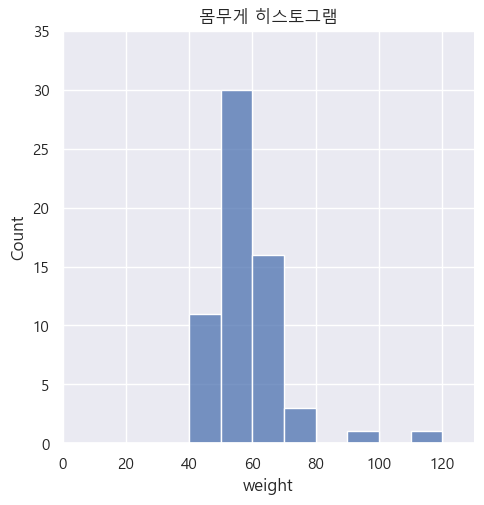

In [ ]:
# histplot
g = sns.displot(data = eda_df,
                x = "weight",
                binwidth = 10,
                kind = "hist")
g.set(title = "몸무게 히스토그램",
      xlim = (0, 130),
      ylim = (0, 35))
plt.show()

## 4.이상치 제거

### 4.1 이상치 확인

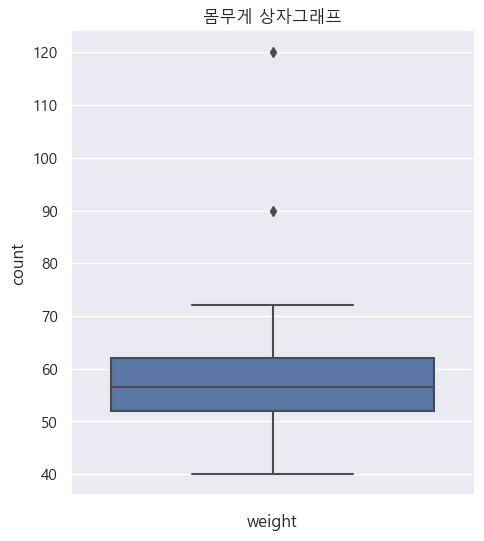

In [ ]:
g = sns.catplot(y = "weight",
                kind = "box",
                data = eda_df)
g.set(title = "몸무게 상자그래프",
      xlabel = "weight",
      ylabel = "count")
plt.show()

In [ ]:
print(np.where(eda_df['weight'] > 80))

(array([60, 61], dtype=int64),)


In [ ]:
# IRQ 및 outlier 확인
# IQR = Q3 - Q1
# from scipy.stats import iqr
q1 = eda_df['weight'].quantile(0.25)
q3 = eda_df['weight'].quantile(0.75)

iqr = iqr(eda_df['weight'])

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(iqr)
print(lower)
print(upper)

10.0
37.0
77.0


### 4.2 이상치 제거

In [ ]:
# 이상치 확인
upper_array = np.where(eda_df['weight'] >= upper)[0]
lower_array = np.where(eda_df['weight'] <= lower)[0]
print(upper_array)
print(lower_array)

[60 61]
[]


In [ ]:
# 이상치 제거
eda_df.drop(index = upper_array, inplace = True)
eda_df.drop(index = lower_array, inplace = True)

In [ ]:
eda_df.shape

(60, 5)

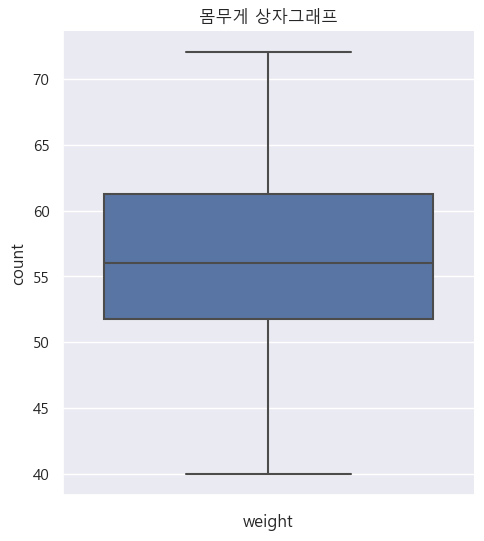

In [ ]:
g = sns.catplot(y = "weight",
                kind = "box",
                data = eda_df)
g.set(title = "몸무게 상자그래프",
      xlabel = "weight",
      ylabel = "count")
plt.show()

# 5.수치형 변수를 범주형으로 변환
- 예제: 50세
- [ : <= , >=
- ( : < , >
- right = False: 45 <= x < 50 (~미만) [50, 55)
- right = True(default): 45 < x <= 50 (~이하) (45, 50]

### 5.1 범위 확인

In [ ]:
pd.cut(x = eda_df['weight'], bins = 7) \
       .value_counts()

weight
(53.714, 58.286]    16
(49.143, 53.714]    11
(58.286, 62.857]    11
(44.571, 49.143]     8
(67.429, 72.0]       6
(62.857, 67.429]     5
(39.968, 44.571]     3
Name: count, dtype: int64

### 5.2 범주형 변환후 저장

In [ ]:
bins = [0, 45, 50, 55, 60, 65, 70, 100]
eda_df['weight_bin'] = pd.cut(x = eda_df['weight'],
                            bins = bins,
                            right = False)
eda_df.head(10)

,id,sex,mrg,age,weight,weight_bin
0,1,남자,결혼,18,40,"[0, 45)"
1,2,여자,기혼,23,50,"[50, 55)"
2,3,남자,기혼,23,56,"[55, 60)"
3,4,여자,기혼,20,51,"[50, 55)"
4,5,남자,결혼,22,55,"[55, 60)"
5,6,남자,결혼,24,61,"[60, 65)"
6,7,여자,기혼,21,70,"[70, 100)"
7,8,여자,기혼,60,44,"[0, 45)"
8,9,여자,결혼,25,66,"[65, 70)"
9,10,남자,기혼,20,60,"[60, 65)"


In [ ]:
bins = [0, 45, 50, 55, 60, 65, 70, 100]
label = ["~45미만", "45~50미만", "50~55미만", "55~60미만",
         "60~65미만","65~70미만", "70이상~"]
eda_df['weight_c'] = pd.cut(x = eda_df['weight'],
                            bins = bins,
                            labels = label,
                            right = False)
eda_df.head(10)

,id,sex,mrg,age,weight,weight_bin,weight_c
0,1,남자,결혼,18,40,"[0, 45)",~45미만
1,2,여자,기혼,23,50,"[50, 55)",50~55미만
2,3,남자,기혼,23,56,"[55, 60)",55~60미만
3,4,여자,기혼,20,51,"[50, 55)",50~55미만
4,5,남자,결혼,22,55,"[55, 60)",55~60미만
5,6,남자,결혼,24,61,"[60, 65)",60~65미만
6,7,여자,기혼,21,70,"[70, 100)",70이상~
7,8,여자,기혼,60,44,"[0, 45)",~45미만
8,9,여자,결혼,25,66,"[65, 70)",65~70미만
9,10,남자,기혼,20,60,"[60, 65)",60~65미만


### 5.3 그래프 그리기

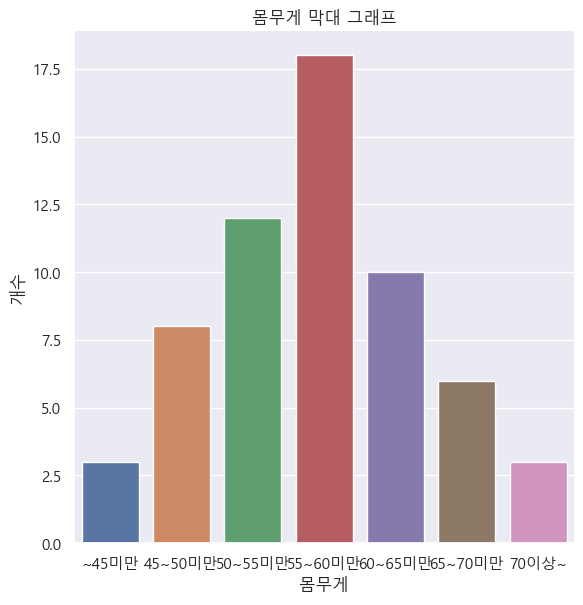

In [ ]:
# 범주형 변수(막대그래프)
g = sns.catplot(data = eda_df,
                height = 6,
                x = "weight_c",
                kind = "count")
g.set(title = "몸무게 막대 그래프",
      xlabel = "몸무게",
      ylabel = "개수")
plt.show()

# 6.수치형 1개 + 범주형 1개

### 6.1 기술통계(그룹별)

In [ ]:
# 그룹별 분석
eda_df.groupby('sex')["weight"].mean().T.round(2)

sex
남자    57.03
여자    55.75
Name: weight, dtype: float64

In [ ]:
eda_df.groupby('sex')["weight"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
남자,32.0,57.03,6.91,40.0,53.75,57.0,61.25,71.0
여자,28.0,55.75,8.15,44.0,49.75,54.5,59.75,72.0


In [ ]:
eda_df.groupby('sex') \
    .agg({"weight": ["count", "mean", "std", "min", "max", "median", "skew"]}) \
    .round(2) # groupby에서는 kurtosis 지원x

weight                                  
     count   mean   std min max median  skew
sex                                         
남자      32  57.03  6.91  40  71   57.0 -0.46
여자      28  55.75  8.15  44  72   54.5  0.54

### 6.2 그래프 그리기

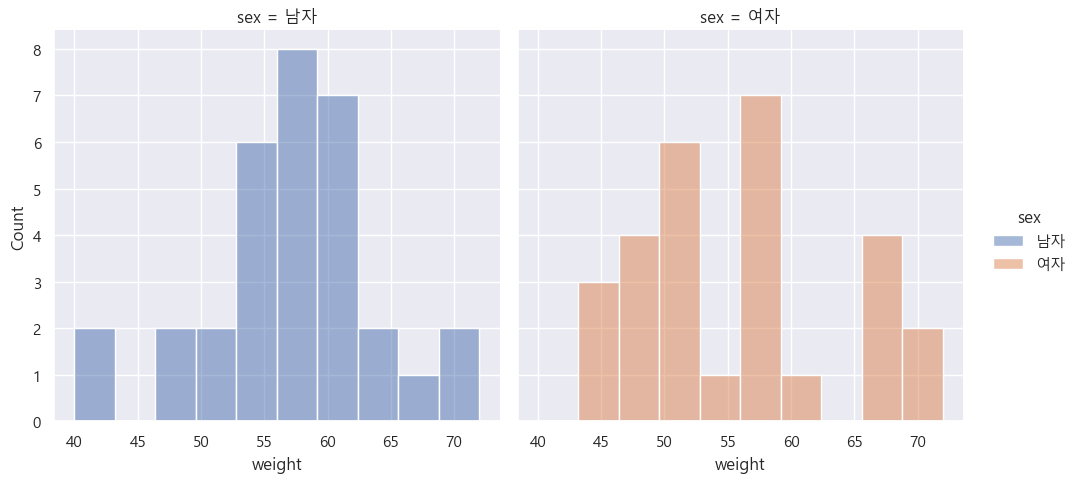

In [ ]:
# 범주형 변수로 구분
sns.displot(data = eda_df,
            x = "weight",
            bins = 10,
            hue = "sex",
            col ="sex",
            kind = "hist")
plt.show()

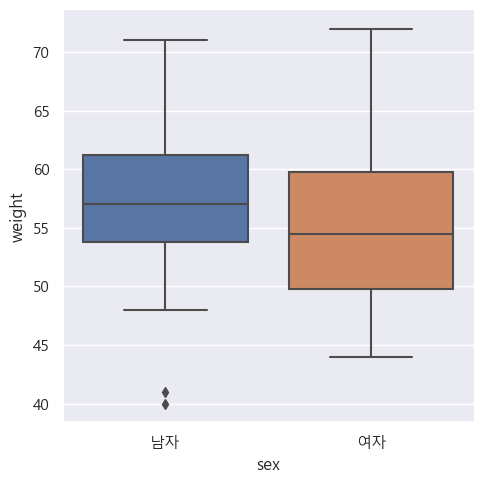

In [ ]:
sns.catplot(data = eda_df,
            x = "sex",
            y = "weight",
            kind = "box")
plt.show()

# 7.다중 수치형 변수(multi numerical variables)

### 7.1 다중 수치형 변수 기술통계

In [ ]:
# pd.describe 이용: 수치형 자료만 분석
eda_df.describe()

,id,age,weight
count,60.000000,60.000000,60.000000
mean,30.500000,29.716667,56.433333
std,17.464249,11.366158,7.472813
min,1.000000,17.000000,40.000000
25%,15.750000,21.000000,51.750000
50%,30.500000,26.000000,56.000000
75%,45.250000,36.250000,61.250000
max,60.000000,60.000000,72.000000


In [ ]:
# 범주형 변수까지 분석
eda_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,60.0,NaN,NaN,NaN,30.5,17.464249,1.0,15.75,30.5,45.25,60.0
sex,60,2,남자,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mrg,60,2,기혼,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,60.0,NaN,NaN,NaN,29.716667,11.366158,17.0,21.0,26.0,36.25,60.0
weight,60.0,NaN,NaN,NaN,56.433333,7.472813,40.0,51.75,56.0,61.25,72.0
weight_bin,60,7,"[55, 60)",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_c,60,7,55~60미만,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 필요한 변수만 선택
eda_df.columns

Index(['id', 'sex', 'mrg', 'age', 'weight', 'weight_bin', 'weight_c'], dtype='object')

In [ ]:
num_feature = ['age', 'weight']
eda_df[num_feature].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,60.0,29.72,11.37,17.0,21.00,26.0,36.25,60.0
weight,60.0,56.43,7.47,40.0,51.75,56.0,61.25,72.0


In [ ]:
# agg 이용해서 필요한 항목만 추출
eda_df[num_feature].agg(["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]).T.round(3)

,count,mean,std,min,max,median,skew,kurtosis
age,60.0,29.717,11.366,17.0,60.0,26.0,0.944,-0.096
weight,60.0,56.433,7.473,40.0,72.0,56.0,0.078,-0.381


In [ ]:
# stats package 이용
stats.describe(eda_df[num_feature])

DescribeResult(nobs=60, minmax=(array([17, 40], dtype=int64), array([60, 72], dtype=int64)), mean=array([29.71666667, 56.43333333]), variance=array([129.18954802,  55.84293785]), skewness=array([0.92037327, 0.07560814]), kurtosis=array([-0.18648135, -0.44803634]))

### 7.2 그룹별 기술통계

In [ ]:
# 그룹별 분석
eda_df.groupby('sex')[num_feature].mean().T.round(2)

sex,남자,여자
age,26.94,32.89
weight,57.03,55.75


In [ ]:
eda_df.groupby('sex')[num_feature].describe().round(2)

age                                              weight               \
    count   mean    std   min   25%   50%    75%   max  count   mean   std   
sex                                                                          
남자   32.0  26.94   8.25  17.0  21.0  24.0  31.75  46.0   32.0  57.03  6.91   
여자   28.0  32.89  13.58  18.0  21.0  28.5  44.00  60.0   28.0  55.75  8.15   

                                     
      min    25%   50%    75%   max  
sex                                  
남자   40.0  53.75  57.0  61.25  71.0  
여자   44.0  49.75  54.5  59.75  72.0

In [ ]:
eda_df.groupby('sex')[num_feature].agg(["count", "mean", "std", "min", "max", "median", "skew"]).round(3)

age                                       weight                         \
    count    mean     std min max median   skew  count    mean    std min max   
sex                                                                             
남자     32  26.938   8.254  17  46   24.0  0.836     32  57.031  6.907  40  71   
여자     28  32.893  13.582  18  60   28.5  0.563     28  55.750  8.145  44  72   

                   
    median   skew  
sex                
남자    57.0 -0.463  
여자    54.5  0.539

In [ ]:
for num in num_feature:
    print("----", num, "----")
    results = eda_df.groupby('sex')[num].describe().round(2)
    print(results, "\n")

---- age ----
     count   mean    std   min   25%   50%    75%   max
sex                                                    
남자    32.0  26.94   8.25  17.0  21.0  24.0  31.75  46.0
여자    28.0  32.89  13.58  18.0  21.0  28.5  44.00  60.0 

---- weight ----
     count   mean   std   min    25%   50%    75%   max
sex                                                    
남자    32.0  57.03  6.91  40.0  53.75  57.0  61.25  71.0
여자    28.0  55.75  8.15  44.0  49.75  54.5  59.75  72.0 



### 7.3 그래프 그리기

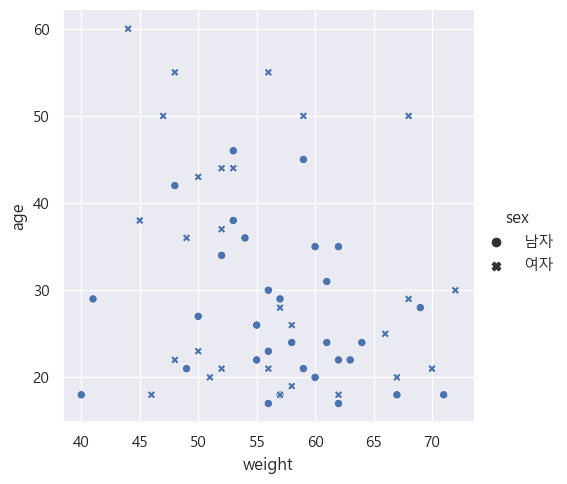

In [ ]:
sns.relplot(data = eda_df,
            x = "weight",
            y = "age",
            style = "sex")
plt.show()

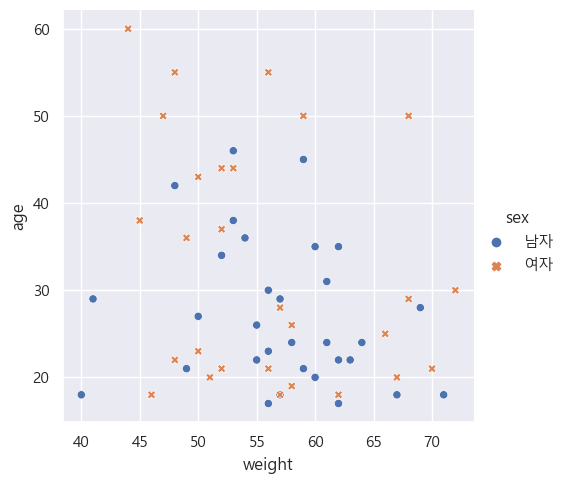

In [ ]:
# 그룹별
sns.relplot(data = eda_df,
            x = "weight",
            y = "age",
            hue = "sex",
            style = "sex")
plt.show()

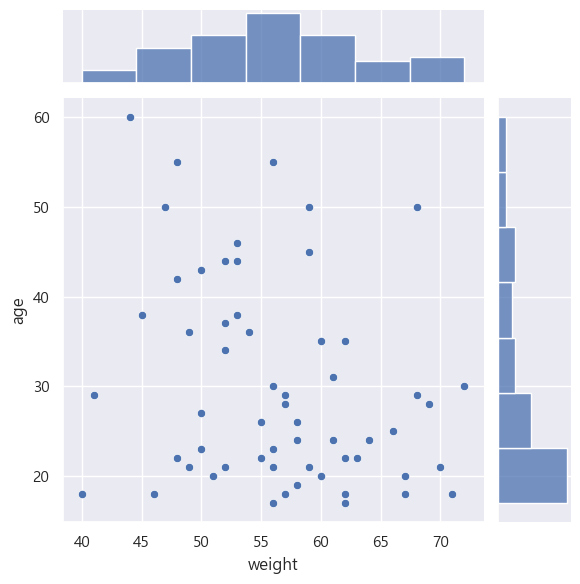

In [ ]:
sns.jointplot(data = eda_df,
              x = "weight",
              y = "age")         # default: kind = "hist"
plt.show()

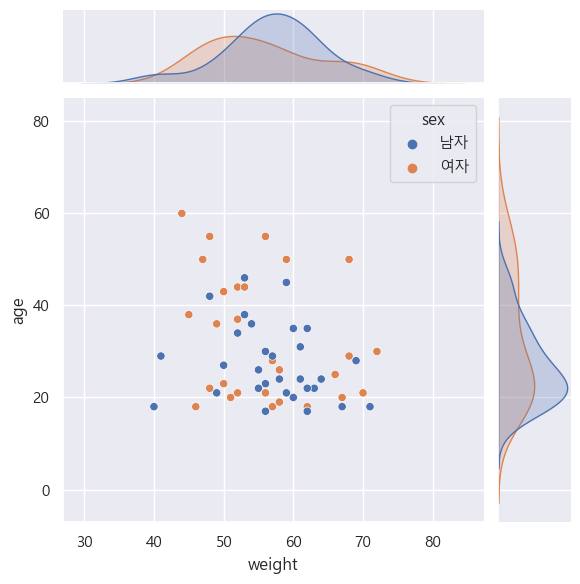

In [ ]:
sns.jointplot(data = eda_df,
              x = "weight",
              y = "age",
              hue = "sex")
plt.show()

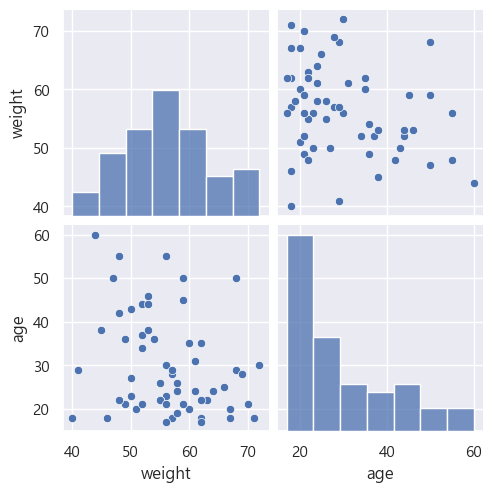

In [ ]:
sns.pairplot(vars = ["weight", "age"],
             data = eda_df)
plt.show()

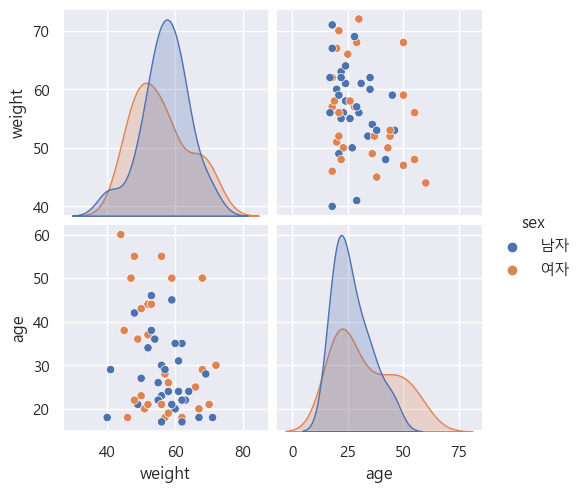

In [ ]:
sns.pairplot(vars = ["weight", "age"],
             hue = "sex",
             data = eda_df)
plt.show()

# 연습문제
07.온라인게임.csv를 이용하여 수치형 자료를 분석하세요.
- Q1.나이(age)의 기초통계분석(rstatix), 히스토그램(bins=10), 상자
도표
- Q2.age의 이상치 제거(±3.0 이상만 제거)
- Q3.age를 범주형으로 변환(10대, 20대, 30대 등으로 구분), 막대그
래프 그리기
- Q4.성별에 따른 age의 점수를 구하고, box plot 그리기
- Q5.Design과 Flow의 값 구하고, 산점도로 표시
- Q6.성별에 따른 Design과 Flow의 값 구하고, 산점도로 표시